### Importing Libraries


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

### Importing Data 

In [8]:
test = pd.read_csv('D:/ML/LogisticRegression/titanic_test.csv')
train=pd.read_csv('D:/ML/LogisticRegression/titanic_train.csv')

In [13]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [10]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### Data Inspection

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [15]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Visualizations 



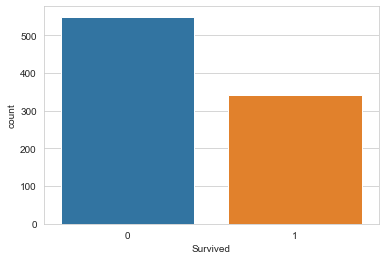

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)
plt.show()

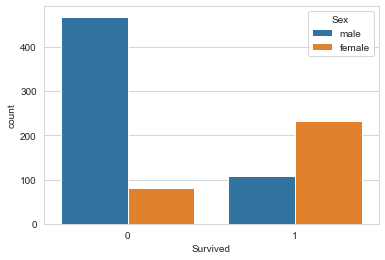

In [22]:
sns.countplot(x='Survived',hue='Sex',data=train)
plt.show()

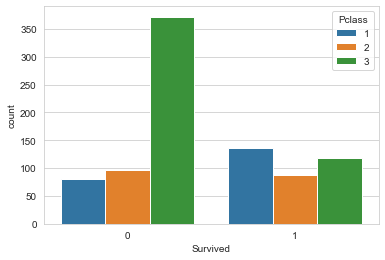

In [23]:
sns.countplot(x='Survived',hue='Pclass',data=train)
plt.show()

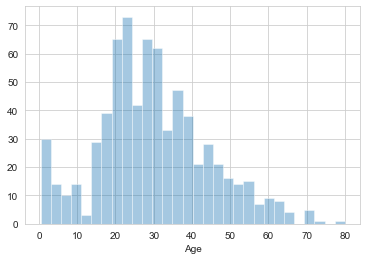

In [29]:
#Graph to see age of all passengers 
sns.distplot(train['Age'].dropna(),kde=False,bins=30)
plt.show()

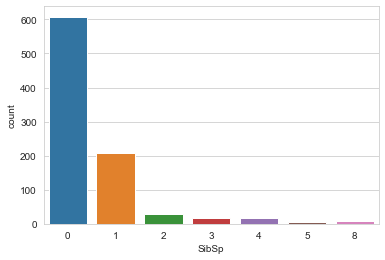

In [30]:
#graph to see if passengers were related to each other (family/ kids /spouses)
sns.countplot(x='SibSp',data=train)
plt.show()

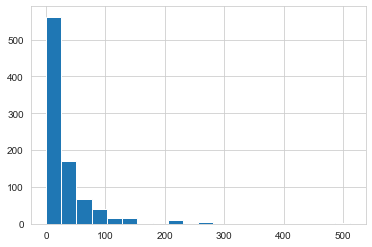

In [36]:
# Diffrent prices paid by the diffrent passengers 
train['Fare'].hist(bins=20)
plt.show()

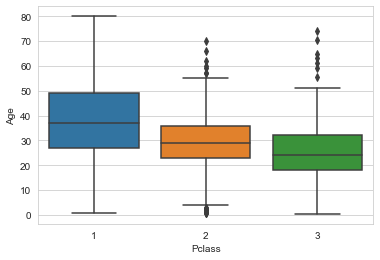

In [39]:
# diffrent age group in diffrent classes
sns.boxplot(x='Pclass',y='Age',data=train)
plt.show()

### Missing Values 

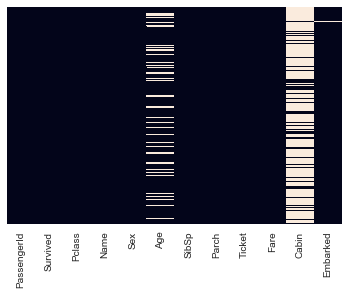

In [40]:
# For Train Data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)
plt.show()

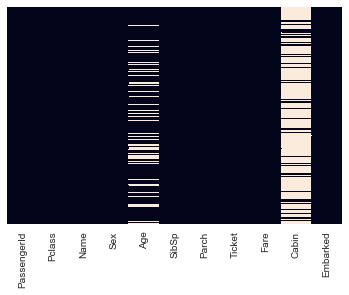

In [41]:
 # For Test Data
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)
plt.show()

It is visible that a lot of data is missing from Age and Cabin Columns 

In [46]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age


In [48]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)
test['Age']=test[['Age','Pclass']].apply(impute_age,axis=1)


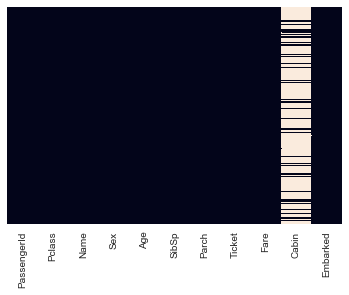

In [49]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)
plt.show()

In [53]:
# Dropping Cabin from both Dataframes
train.drop('Cabin',axis=1,inplace=True)


In [54]:
train.dropna(inplace=True)
test.dropna(inplace=True)

### Creating Dummy Variables for Categorical Variables

In [56]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
Embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [57]:
train=pd.concat([train,sex,Embark],axis=1)

In [58]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [60]:
train.drop(['Sex','Embarked','Name','Ticket'],inplace=True,axis=1)

In [68]:
#sex=pd.get_dummies(test['Sex'],drop_first=True)
#Embark=pd.get_dummies(test['Embarked'],drop_first=True)
#test=pd.concat([test,sex,Embark],axis=1)
#test.drop(['Sex','Embarked','Name','Ticket'],inplace=True,axis=1)
test.drop(['PassengerId'],inplace=True,axis=1)
train.drop(['PassengerId'],inplace=True,axis=1)

In [69]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [70]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [72]:
X=train.drop(['Survived'],axis=1)
y=train['Survived']

In [73]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [76]:
from sklearn.linear_model import LogisticRegression

In [78]:
logm= LogisticRegression()


In [79]:
logm.fit(X_train,y_train)

C:\Users\arpit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
predictions= logm.predict(X_test)

In [87]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [82]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       184
           1       0.76      0.71      0.73       110

    accuracy                           0.81       294
   macro avg       0.79      0.79      0.79       294
weighted avg       0.80      0.81      0.80       294



In [88]:
confusion_matrix(y_test,predictions)

array([[159,  25],
       [ 32,  78]], dtype=int64)